In [1]:
# Check if curve_db is loaded, if not load it
try:
    curve_db
    print(f"✓ curve_db is already loaded with {len(curve_db)} isogeny classes")
except NameError:
    print("Loading curve database...")
    curve_db = load('Curve Database (Conductor < 100 000)/curve_database_c1_to_100000.sobj')
    print(f"✓ Loaded curve_db with {len(curve_db)} isogeny classes")
print()

Loading curve database...
✓ Loaded curve_db with 437226 isogeny classes



In [26]:
from tqdm.notebook import tqdm
import numpy as np

# Find curves with extreme ap at each prime index, by rank
# Rank 0: maximum ap (positive bias)
# Rank 1: minimum ap (negative bias)

# Initialize for rank 0 (tracking maxima)
rk0_max_aps = [float('-inf')] * 1000
rk0_max_labels = [None] * 1000

# Initialize for rank 1 (tracking minima)
rk1_min_aps = [float('inf')] * 1000
rk1_min_labels = [None] * 1000

# Single pass through all curves
for iso in tqdm(curve_db.keys(), desc='Finding extreme ap labels'):
    curve = curve_db[iso]
    rk = curve['rank']
    ap_list = curve['ap_list']
    
    if rk == 0:
        for i in range(1000):
            if ap_list[i] > rk0_max_aps[i]:
                rk0_max_aps[i] = ap_list[i]
                rk0_max_labels[i] = iso
                
    elif rk == 1:
        for i in range(1000):
            if ap_list[i] < rk1_min_aps[i]:
                rk1_min_aps[i] = ap_list[i]
                rk1_min_labels[i] = iso

# rk0_max_labels[i] = isogeny label of rank-0 curve with max ap at prime index i
# rk1_min_labels[i] = isogeny label of rank-1 curve with min ap at prime index i

Finding extreme ap labels:   0%|          | 0/437226 [00:00<?, ?it/s]

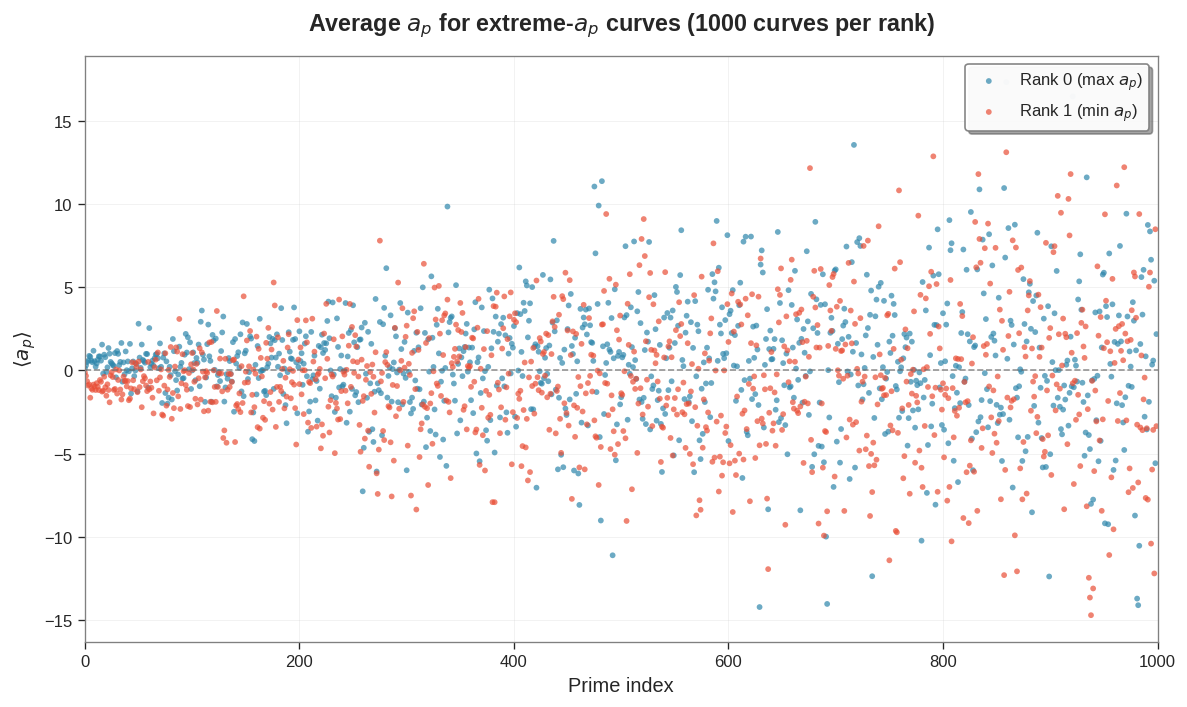

In [27]:
import matplotlib.pyplot as plt

# Compute averages
rk0_avg_aps = np.mean([curve_db[iso]['ap_list'] for iso in rk0_max_labels], axis=0)
rk1_avg_aps = np.mean([curve_db[iso]['ap_list'] for iso in rk1_min_labels], axis=0)

plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(10, 6), dpi=120)

ax.scatter(range(1000), rk0_avg_aps, s=12, alpha=0.7, c='#2E86AB', edgecolors='none', label=r'Rank 0 (max $a_p$)')
ax.scatter(range(1000), rk1_avg_aps, s=12, alpha=0.7, c='#E94F37', edgecolors='none', label=r'Rank 1 (min $a_p$)')

ax.set_xlabel('Prime index', fontsize=12, fontweight='medium')
ax.set_ylabel(r'$\langle a_p \rangle$', fontsize=12, fontweight='medium')
ax.set_title(r'Average $a_p$ for extreme-$a_p$ curves (1000 curves per rank)', fontsize=14, fontweight='bold', pad=15)

ax.axhline(0, color='dimgray', linestyle='--', linewidth=1, alpha=0.7)
ax.set_xlim(0, 1000)

# Grid styling
ax.grid(True, linestyle='-', alpha=0.3, linewidth=0.5)
ax.set_axisbelow(True)

# Legend with box
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, 
          fontsize=10, framealpha=0.95, edgecolor='gray')

# Tick styling
ax.tick_params(axis='both', which='major', labelsize=10, direction='out', length=4)

# Subtle border
for spine in ax.spines.values():
    spine.set_linewidth(0.8)
    spine.set_color('gray')

plt.tight_layout()
plt.savefig('Fastest_murmuration/murmuration_extreme_ap.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()